### Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

df_08.shape, df_18.shape

((987, 13), (832, 13))

### Q1: Are more unique models using alternative fuels in 2018 compared to 2008? By how much?

In [22]:
df_08['fuel'].value_counts()


Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [23]:
df_18['fuel'].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [45]:
# find the unique number of models that are using the alternate fuel in 2008 and 2018.
dfm_08 = df_08.query('fuel != "Gasoline"').model.nunique()
dfm_08

2

In [44]:
# find the unique number of models that are using the alternate fuel in 2008 and 2018.
dfm_18 = df_18.query('fuel != "Gasoline"').model.nunique()
dfm_18

37

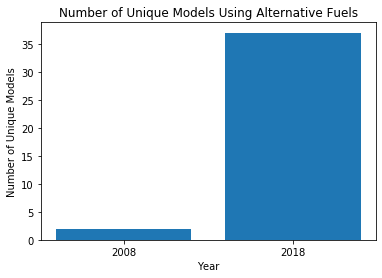

In [47]:
plt.bar(["2008", "2018"], [dfm_08, dfm_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")
plt.show()


### Q2: How much have vehicle classes improved in fuel economy?

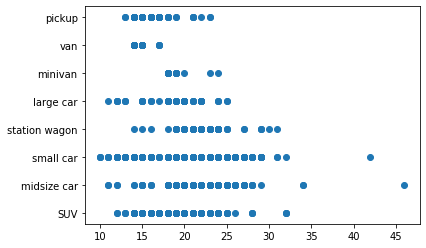

In [54]:
y = df_08['veh_class']
x = df_08['cmb_mpg']

plt.scatter(x, y)

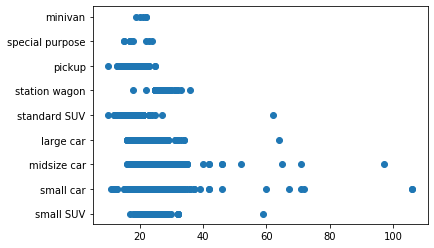

In [55]:
y = df_18['veh_class']
x = df_18['cmb_mpg']

plt.scatter(x, y)

In [58]:
mean_08 = df_08.groupby('veh_class').cmb_mpg.mean()
mean_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [60]:
mean_18 = df_18.groupby('veh_class').cmb_mpg.mean()
mean_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [68]:
increment = mean_18 - mean_08
increment.dropna(inplace=True)
increment

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

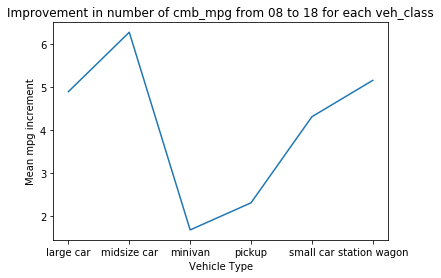

In [72]:
plt.plot(increment.index, increment)
plt.title('Improvement in number of cmb_mpg from 08 to 18 for each veh_class')
plt.xlabel('Vehicle Type')
plt.ylabel('Mean mpg increment')
plt.show()

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [77]:
df_08.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
no,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
yes,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421


In [96]:
df_18.groupby('smartway').mean()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
smartway,,,,,,,
Elite,1.970588,4.000000,7.000000,53.235294,53.117647,53.000000,10.000000
No,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
Yes,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462


In [94]:
dfsn_08 = df_08.query('smartway == "no"')
dfsn_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,4.056837,6.771005,6.293245,15.133443,21.299835,17.316310,4.149918
std,1.203933,1.882335,0.551479,2.564736,3.366852,2.766868,1.629634
min,1.300000,2.000000,4.000000,8.000000,13.000000,10.000000,0.000000
25%,3.200000,6.000000,6.000000,13.000000,19.000000,15.000000,3.000000
50%,3.800000,6.000000,6.000000,15.000000,21.000000,18.000000,5.000000
75%,4.900000,8.000000,7.000000,17.000000,24.000000,19.000000,5.000000
max,8.400000,16.000000,9.500000,21.000000,28.000000,23.000000,7.000000


In [95]:
dfsy_08 = df_08.query('smartway == "yes"')
dfsy_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [99]:
dfsn_18 = df_18.query('smartway == "No"')
dfsn_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.270304,5.720994,3.798343,19.325967,26.708564,22.041436,4.276243
std,1.346987,1.760816,1.746982,4.115731,5.073390,4.424682,1.256106
min,1.400000,3.000000,1.000000,9.000000,12.000000,10.000000,1.000000
25%,2.000000,4.000000,3.000000,16.000000,23.000000,19.000000,3.000000
50%,3.000000,6.000000,3.000000,19.000000,27.000000,22.000000,4.000000
75%,3.900000,6.000000,5.000000,22.000000,30.000000,25.000000,5.000000
max,8.000000,16.000000,7.000000,59.000000,61.000000,60.000000,10.000000


In [101]:
dfsy_18 = df_18.query('smartway == "Yes"')
dfsy_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1.753846,3.923077,4.879121,31.483516,39.296703,34.439560,7.538462
std,0.420399,0.452911,1.769087,11.239180,9.410980,10.214596,0.860332
min,1.200000,3.000000,3.000000,25.000000,27.000000,27.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,30.000000,40.000000,34.000000,8.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [102]:
dfse_18 = df_18.query('smartway == "Elite"')
dfse_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,17.000000,17.0,17.0,17.000000,17.000000,17.000000,17.0
mean,1.970588,4.0,7.0,53.235294,53.117647,53.000000,10.0
std,0.277859,0.0,0.0,25.914594,21.854297,24.065016,0.0
min,1.500000,4.0,7.0,26.000000,28.000000,26.000000,10.0
25%,2.000000,4.0,7.0,27.000000,33.000000,29.000000,10.0
50%,2.000000,4.0,7.0,48.000000,47.000000,46.000000,10.0
75%,2.000000,4.0,7.0,66.000000,68.000000,67.000000,10.0
max,2.500000,4.0,7.0,113.000000,99.000000,106.000000,10.0


### Q4: What features are associated with better fuel economy?

In [15]:
print(f'df_08 shape:  {df_08.shape}')
mean_fuel_eff = df_08.cmb_mpg.mean()
better_half = df_08.query('cmb_mpg > cmb_mpg.mean()')
print(f'DF shape whose cmb_mpg is above cmb_mpg.mean:  {better_half.shape}')
better_half.head(1)

df_08 shape:  (987, 13)
DF shape whose cmb_mpg is above cmb_mpg.mean:  (519, 13)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes


In [21]:
better_half.shape


(519, 13)